In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('/content/drive/MyDrive/cmsc320final/Condominium_Comparable_Rental_Income_in_NYC.csv')

# remove rows with NaN values
df = df.dropna()

In this part of the project, we will be looking at when and where condominiums were being built in New York City. To prepare ourselves to answer these questions, we dropped rows with missing information. This included dropping rows where the Year Built column had a value of 0. I also added a column of the borough. In the Boro-Block-Lot column, the first number encodes the borough (1=Manhattan, 2=The Bronx, 3=Brooklyn, 4=Queens, 5=Staten Island).

In [5]:
# remove values where year built is 0
df = df[df['Year Built'] != 0]
df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
22068,5-00001-7502,155 BAY STREET,NEW BRIGHTON-ST. GEORGE,R4 -ELEVATOR,57,2005.0,62045,1310390,618589.0,691801,5345009.0,2019
22069,5-04633-7501,3871 AMBOY ROAD,GREAT KILLS,R4 -ELEVATOR,17,2010.0,25139,496747,193570.0,303177,2310003.0,2019
22070,5-00001-7503,90 BAY STREET LANDING,NEW BRIGHTON-ST. GEORGE,R4 -ELEVATOR,101,1900.0,182861,2801431,1486660.0,1314771,9376009.0,2019
22071,5-00487-7501,7 NAVY PIER COURT,TOMPKINSVILLE,RR -CONRENT,467,2014.0,361176,8516530,3564807.0,4951723,39042000.0,2019


In [6]:
df.dtypes['Boro-Block-Lot']

dtype('O')

We see that the Boro-Block-Lot column is of type object. I convert this to a string and then extract the first number that encodes to the borough to make the new column. 

In [7]:
boro = []
for index, row in df.iterrows():
  bstr = str(row['Boro-Block-Lot'])
  bint = int(bstr[0])
  if bint == 1:
    boro.append('MANHATTAN')
  elif bint == 2:
    boro.append('THE BRONX')
  elif bint == 3:
    boro.append('BROOKLYN')
  elif bint == 4:
    boro.append('QUEENS')
  else:
    boro.append('STATEN ISLAND')

df['Borough'] = boro

We need to know the earliest and latest condo built in order to make a histogram with the proper amount of bins.

In [8]:
print(df['Year Built'].min(), df['Year Built'].max())

1825.0 2019.0


Below I make a new DataFrame with each condo appearing in the dataframe once. I am doing this because the original dataframe has reports from 2012 to 2019. So if a condo was built before 2012, it will appear in the dataframe 8 times. We only want to account for each condo once. I originally thought to do this by iterrating through df, adding a row to a new df if the Boro-Block-Lot number was not already in the new df. I realized this would be inefficient and I could use the drop_duplicates() function. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd704a1d30>]],
      dtype=object)

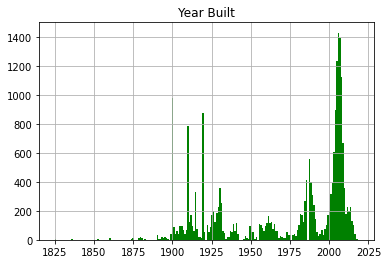

In [9]:
years = df[['Boro-Block-Lot', 'Address','Year Built']].copy()
years.drop_duplicates()
years.hist(column= 'Year Built', bins = 200, color = 'green')

From this histogram, we can see that there was a huge surge in condominiums being built after 2000. Let's take a closer look at specific time periods.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd701a7580>]],
      dtype=object)

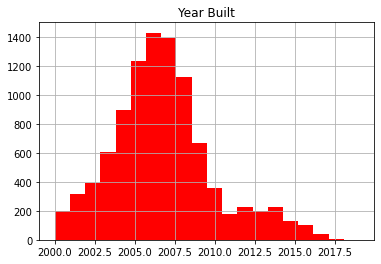

In [10]:
new_century = years[years['Year Built'] >= 2000]
new_century.hist(column= 'Year Built', bins = new_century['Year Built'].unique().size, color = 'red')

Looking at this plot, we can see a huge drop off in condominiums being built after 2008. We had an economic recession in 2008. Our economy was in shambles following this recession and housing prices went way down. So developers were hesitant to build new condos in New York City. Also a lot of people were out of work, so there were definetly difficulties finding human capital to build new condos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6fc7ea90>]],
      dtype=object)

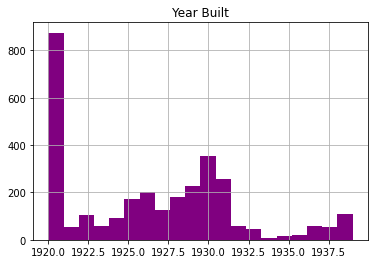

In [11]:
depression = years[years['Year Built'] >= 1920]
depression = depression[depression['Year Built'] <= 1939]
depression.hist(column= 'Year Built', bins = depression['Year Built'].unique().size, color = 'purple')

This plot tells a story of our country and The Great Depression of 1929-1939. Prior to The Great Depression, we had the Roaring 20's, a period of economic boom. We see condos being built and at an increasing rate through the 1920s. Then the stock market crashed in 1929, many people lost their jobs and houses, the country fell into a terrible economic recession. In 1934 the Federal Housing Administration was introduced which can explain the uptick in development at the end of the Depression. These events explain the halt in new condominiums being built after 1931 and then more condominiums were being built after 1934.

In [12]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders.base import GeocoderTimedOut

geolocator = Nominatim(user_agent="geoapiExercises")


In [13]:
place = "1 COENTIES SLIP, FINANCIAL DISTRICT, MANHATTAN, CITY OF NEW YORK, NEW YORK"
location = geolocator.geocode(place)
print(location.latitude)
data = location.raw
print(location, data)

40.703548
1, Coenties Slip, Financial District, Manhattan, New York County, City of New York, New York, 10004, United States {'place_id': 308252414, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 5671326, 'boundingbox': ['40.703498', '40.703598', '-74.010674', '-74.010574'], 'lat': '40.703548', 'lon': '-74.010624', 'display_name': '1, Coenties Slip, Financial District, Manhattan, New York County, City of New York, New York, 10004, United States', 'class': 'place', 'type': 'house', 'importance': 0.06000000000000005}


In [14]:
temp = df.loc[0:10].copy()
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in temp.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
    data = location.raw
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    lats.append(data['lat'])
    longs.append(data['lon'])


temp['Lat'] = lats
temp['Lon'] = longs
temp

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough,Lat,Lon
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,MANHATTAN,40.703548,-74.010624
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,MANHATTAN,40.7027759,-74.012773
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,MANHATTAN,39.1536479,-111.817677
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,MANHATTAN,40.70983015,-74.01791350733029
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012,MANHATTAN,41.02637625,-92.41190449999999
6,1-00016-7503,250 SOUTH END AVENUE,TRIBECA,R4-CONDOMINIUM,109,1985.0,105000,4471950,1131900.0,3340050,19435362.0,2012,MANHATTAN,40.709646899999996,-74.01625042482377
7,1-00016-7504,300 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,107,1986.0,87479,3668869,1041875.0,2626994,19833999.0,2012,MANHATTAN,40.7099286,-74.01677637343651
8,1-00016-7505,380 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,247,1987.0,255845,9801422,2499606.0,7301816,55129007.0,2012,MANHATTAN,40.70907625,-74.01818482315421
9,1-00016-7506,280 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,121,1985.0,106129,4451050,1263996.0,3187054,24062007.0,2012,MANHATTAN,40.7088551,-74.0166594
10,1-00016-7507,300 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,154,1986.0,126008,5284776,1500755.0,3784021,28569001.0,2012,MANHATTAN,40.7088046,-74.01744829470954


Above is me toying with the geopy library. I put in the address from the first column of df and I was able to convert this into data about that location. Using the geocode, we are able to get a dictionary with location data about the address, we can extract the latitude and longitude for each condo and add it to the df.

In [15]:
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in years.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

years['Lat'] = lats
years['Lon'] = longs

AttributeError: ignored

For whatever reason, when I tried to fetch the latitude and longitude for every single condo in the dataframe, I reached an error in my code. "AttributeError: 'NoneType' object has no attribute 'raw'" was the error message the above code block terminated with. These are cases where geopy was not able to find a location for the given address. I also handled timeout exceptions by making the latitude and longitude for these condos (0, 0). Later I will filter the locations that timed-out from my data. I still want to do some map analysis so I will take the coordinates for condos with specific attributes. 

In [16]:
nine_tn = df[df['Report Year'] == 2019]
top_valued = nine_tn.sort_values(by='Full Market Value', ascending=False)
top_valued = top_valued[:100]

from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in top_valued.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

top_valued['Lat'] = lats
top_valued['Lon'] = longs

In [17]:
top_valued

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough,Lat,Lon
20124,1-01090-7502,605 WEST 42 STREET,CLINTON,RR -CONRENT,1174,2008.0,991724,57886930,16135349.0,41751581,339084999.0,2019,MANHATTAN,26.261543,-98.3485431
20121,1-00607-7503,133 WEST 11 STREET,GREENWICH VILLAGE-WEST,R4 -ELEVATOR,199,2013.0,681903,39420812,8305579.0,31115233,252702013.0,2019,MANHATTAN,39.1952,-94.6849757
20125,1-01171-7510,21 WEST END AVENUE,UPPER WEST SIDE (59-79),RR -CONRENT,616,2013.0,683518,39083559,9193317.0,29890242,242754000.0,2019,MANHATTAN,51.57955725,-0.0019892440213608153
20203,2-03944-7501,9 METROPOLITAN OVAL,PARKCHESTER,R4 -ELEVATOR,3857,1955.0,3801490,62914660,30183831.0,32730829,238573877.0,2019,THE BRONX,40.83945595,-73.85969934835572
19606,1-01115-7501,25 CENTRAL PARK WEST,UPPER WEST SIDE (59-79),R4 -ELEVATOR,423,1932.0,598316,34588648,5630154.0,28958494,235185988.0,2019,MANHATTAN,40.7704241,-73.98123314817387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19348,1-01113-7501,30 WEST 61 STREET,UPPER WEST SIDE (59-79),R4 -ELEVATOR,165,1982.0,202235,12202860,3753482.0,8449378,68622004.0,2019,MANHATTAN,0,0
19998,1-01373-7504,405 MAIN STREET,ROOSEVELT ISLAND,RR -CONRENT,242,2007.0,237122,12254465,3815293.0,8439172,68539000.0,2019,MANHATTAN,0,0
19753,1-01400-7501,181 EAST 65 STREET,UPPER EAST SIDE (59-79),R4 -ELEVATOR,93,2000.0,180846,11006288,2575247.0,8431041,68472999.0,2019,MANHATTAN,33.753786,-113.566855
19904,1-00915-7501,225 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,191,2007.0,222784,12072665,3744999.0,8327666,67633015.0,2019,MANHATTAN,39.064622840455485,-94.5828768372411


In [18]:
top_valued['Lat'] = pd.to_numeric(top_valued['Lat'])
top_valued['Lon'] = pd.to_numeric(top_valued['Lon'])

I want to analyze where the top valued condos are located for the report year 2019. 

From a glance at the new dataframe top_valued, we can see that geopy wasn't able to fetch coordinates for some of these addresses and it provided worng coordinates for others. So we put restrictions on the latitude and longitude to make sure all of our points were in New York City. From the 100 top valued condos in 2019, we have 34 data points.

In [19]:
temp = top_valued[top_valued['Lon'] < -73.42]
temp = temp[temp['Lon'] > -74.3]
temp = temp[temp['Lat'] > 40.4]
temp = temp[temp['Lat'] < 40.95]
temp['Lat'].size

34

In [20]:
import folium
import requests

In [21]:
top_locs = temp.copy()

In [22]:
boro_map = folium.Map(location=[temp['Lat'].mean(), temp['Lon'].mean()], zoom_start=11)

In [23]:
for index, row in top_locs.iterrows():
  if row['Borough'] == 'MANHATTAN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='red')).add_to(boro_map)
  elif row['Borough'] == 'THE BRONX':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='blue')).add_to(boro_map)
  elif row['Borough'] == 'QUEENS':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='green')).add_to(boro_map)
  elif row['Borough'] == 'BROOKLYN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='orange')).add_to(boro_map)
  else:
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='purple')).add_to(boro_map)

boro_map

This map displays the locations of 34 of the top valued condos in New York City for the report year 2019. From the map we can see that a large number of these condos are in Manhattan. We also notice that the condos that aren't in Manhattan are located very close to Manhattan. It seems that property in Manhattan holds a higher value as well as property close to Manhattan. Staten Island has none of the high valued condos for 2019. This follows our assertion about the property value being inflated in Manhattan. Staten Island is separated from Manhattan by the bay. The other boroughs that have high valued condos have much easier access to Manhattan. We can call the three points in The Bronx and exception to the assertion we made about condos in and around Manhattan. These condos are not near Manhattan, yet they hold high value. 

In [31]:
fift = df[df['Year Built'] >= 2015]
fift = fift[fift['Report Year'] == 2019]
fift

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough
20002,1-00352-7501,115 DELANCEY STREET,LOWER EAST SIDE,RR -CONRENT,53,2016.0,88827,2143396,535627.0,1607769,12725000.0,2019,MANHATTAN
20095,2-03027-7501,4215 PARK AVENUE,BATHGATE,RR -CONRENT,256,2016.0,313553,5230064,2354783.0,2875281,21023000.0,2019,THE BRONX
20120,1-00346-7501,145 CLINTON STREET,LOWER EAST SIDE,RR -CONRENT,152,2015.0,156074,7454094,1507675.0,5946419,48294000.0,2019,MANHATTAN
20122,1-00878-7501,130 EAST 23 STREET,GRAMERCY,R4 -ELEVATOR,145,2017.0,267815,17780238,5334875.0,12445363,101082005.0,2019,MANHATTAN
20127,1-01911-7502,155 WEST 126 STREET,HARLEM-CENTRAL,R2 -WALK-UP,12,2015.0,13325,433329,80350.0,352979,2866998.0,2019,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22029,4-12603-7501,118-35 FARMERS BOULEVARD,ST. ALBANS,RR -CONRENT,66,2016.0,87958,1991369,703664.0,1287705,10081000.0,2019,QUEENS
22030,4-01223-7504,67-19 ROOSEVELT AVENUE,75TH Q QUEENS,R4 -ELEVATOR,9,2016.0,10719,217917,65386.0,152531,1169997.0,2019,QUEENS
22031,4-00415-7504,41-04 27 STREET,LONG ISLAND CITY,R4 -ELEVATOR,32,2015.0,27553,810609,275530.0,535079,4344998.0,2019,QUEENS
22032,4-00382-7501,31-12 38 AVENUE,LONG ISLAND CITY,R4 -ELEVATOR,18,2017.0,19528,696368,222814.0,473554,3846001.0,2019,QUEENS


In [32]:
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in fift.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

fift['Lat'] = lats
fift['Lon'] = longs

In [33]:
fift['Lat'] = pd.to_numeric(fift['Lat'])
fift['Lon'] = pd.to_numeric(fift['Lon'])
temp = fift[fift['Lon'] < -73.42]
temp = temp[temp['Lon'] > -74.3]
temp = temp[temp['Lat'] > 40.4]
temp = temp[temp['Lat'] < 40.95]
fift_locs = temp.copy()
fift_locs['Lat'].size

91

From the 193 condos built in 2015 or after, geopy was able to give the coordinates for 91.

In [34]:
fift_map = folium.Map(location=[temp['Lat'].mean(), temp['Lon'].mean()], zoom_start=11)

In [35]:
for index, row in fift_locs.iterrows():
  if row['Borough'] == 'MANHATTAN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='red')).add_to(fift_map)
  elif row['Borough'] == 'THE BRONX':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='blue')).add_to(fift_map)
  elif row['Borough'] == 'QUEENS':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='green')).add_to(fift_map)
  elif row['Borough'] == 'BROOKLYN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='orange')).add_to(fift_map)
  else:
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='purple')).add_to(fift_map)

fift_map

This map displays the locations of condominiums that were built in 2015 or later with the color distinguishing the borough of the condo at that location. Red is manhattan, Orange is Brooklyn, Green is Queens, Blue is The Bronx, and Purple is Staten Island. The first thing that can be noticed on this map, is that some of the markers are placed in a different borough than what the Borough column says. This happens because geopy is fetching the wrong location for these points. We will discount these from our analysis of this map. From the map we can see that there are no condos being built in Staten Island. We can see that most of the new condos built are in Brooklyn. Queens and The Bronx have also developed a lot of new condos since 2015. In Manhattan, not many new condominiums are being built, the few that have been established in these recent years are built close to each other. 

In [37]:
df.groupby(['Borough'])['Year Built'].mean()

Borough
BROOKLYN         1985.907484
MANHATTAN        1955.362911
QUEENS           1986.811084
STATEN ISLAND    1978.536765
THE BRONX        1990.666667
Name: Year Built, dtype: float64

These results support our assertions about the map. We see that Brooklyn, Queens, and The Bronx have newer condos than Staten Island and Manhattan. 

Hypothesis Testing: We want to see if there is a difference in the Building Classifications between the different Boroughs. To do this we will run a Chi-Square Test. Our null hypothesis is that building classification and borough are independent. The alternative hypothesis is that a building's classification is dependent on borough. 

Here is a contingency table showing the frequencies of each building classification in each borough.

In [62]:
gency = pd.crosstab(df['Building Classification'], df['Borough'])
gency

Borough,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,THE BRONX
Building Classification,,,,,
R2 -WALK-UP,477,152,230,10,40
R2-CONDOMINIUM,658,231,310,19,62
R2-WALK-UP,723,245,319,18,69
R4 -ELEVATOR,1298,1603,798,58,66
R4-CONDOMINIUM,1278,2969,744,75,104
R4-ELEVATOR,1789,3352,1006,86,103
R9 -CONDOPS,51,291,53,0,17
R9-CONDOMINIUM,56,493,76,0,25
R9-CONDOPS,78,532,96,0,25


This is the same table normalized as percentages.

In [63]:
gency_pct = pd.crosstab(df['Building Classification'], df['Borough'], normalize='index')
gency_pct

Borough,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,THE BRONX
Building Classification,,,,,
R2 -WALK-UP,0.524752,0.167217,0.253025,0.011001,0.044004
R2-CONDOMINIUM,0.514062,0.180469,0.242188,0.014844,0.048438
R2-WALK-UP,0.526201,0.178311,0.232169,0.013100,0.050218
R4 -ELEVATOR,0.339524,0.419304,0.208737,0.015171,0.017264
R4-CONDOMINIUM,0.247195,0.574275,0.143907,0.014507,0.020116
R4-ELEVATOR,0.282355,0.529040,0.158775,0.013573,0.016256
R9 -CONDOPS,0.123786,0.706311,0.128641,0.000000,0.041262
R9-CONDOMINIUM,0.086154,0.758462,0.116923,0.000000,0.038462
R9-CONDOPS,0.106703,0.727770,0.131327,0.000000,0.034200


I made this heatmap to get an idea about how different these frequencies were before running the Chi-Square test.

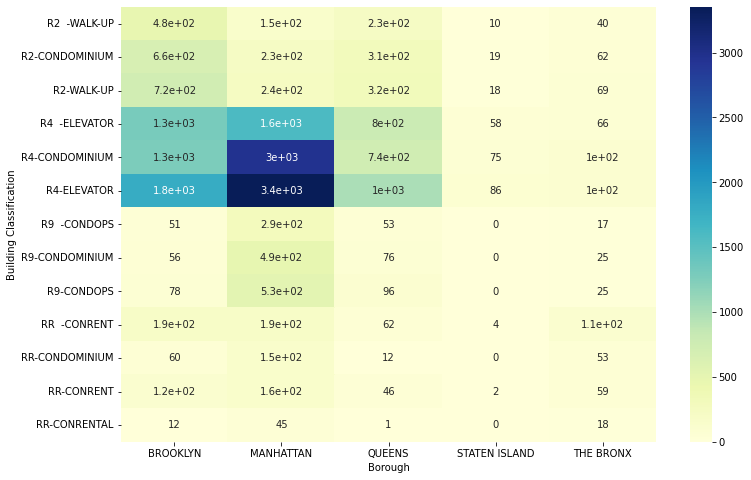

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(gency, annot=True, cmap='YlGnBu')

In [65]:
c, p, dof, expected = chi2_contingency(gency)
print(p)

0.0


Our p-value is below 0.05 so we reject the null hypothesis, meaning there is a dependence between building classification and borough. 